In [7]:
#Diabetes 130-US Hospitals for Years 1999-2008
from ucimlrepo import fetch_ucirepo
import pandas as pd
pd.options.mode.chained_assignment = None
# faz o fetch do dataset
dataset = fetch_ucirepo(id=296)
# dados (pandas dataframes)
X = dataset.data.features
y = dataset.data.targets
y.to_numpy()
y

/usr/local/anaconda3/lib/python3.11/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO
...,...
101761,>30
101762,NO
101763,NO
101764,NO


In [8]:
X.isnull().sum()

race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [9]:
#removendo atributos com grandes quantidade de valores nulos
X.drop(['A1Cresult', 'max_glu_serum','medical_specialty', 'payer_code','max_glu_serum','diag_1','diag_2','diag_3','weight'], axis=1, inplace=True)
#inserindo moda em valores nulos de um atributo
moda_ = X['race'].mode()[0]
X['race'].fillna(moda_, inplace=True)

In [10]:
atributos_object = X.dtypes == 'object'
atributos_object = X.columns[atributos_object]
atributos_object

Index(['race', 'gender', 'age', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder
for atributo in atributos_object:
    X[atributo] = LabelEncoder().fit_transform(X[atributo])

In [12]:
from sklearn.preprocessing import MinMaxScaler
for atributo in X.columns:
    X[atributo] = MinMaxScaler().fit_transform(X[[atributo]])

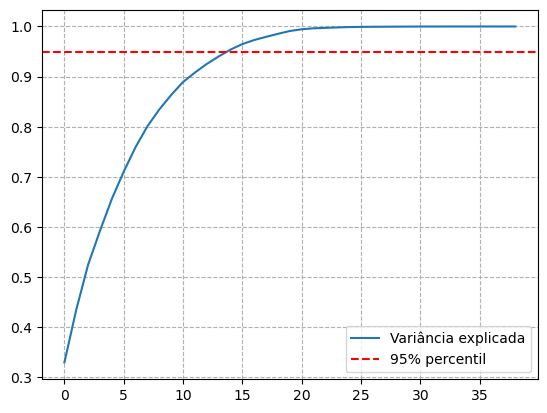

In [13]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Variância explicada')
plt.axhline(0.95, color='red', linestyle='--', label='95% percentil')
plt.grid(True, linestyle='--')
plt.legend()

In [14]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)

In [15]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   readmitted  101766 non-null  object
dtypes: object(1)
memory usage: 795.2+ KB


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=99)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
classificadores = {
'KNN': KNeighborsClassifier(),
'SVM': SVC(),
'DT' : DecisionTreeClassifier(),
'RF' : RandomForestClassifier(),
'LR' : LogisticRegression(max_iter=200),
'NB' : GaussianNB()
}

In [18]:
import time
acuracia_treino = {}
tempo_treino = {}
for clf in classificadores:
    start_time = time.process_time()
    classificadores[clf].fit(X_train, y_train.values.ravel())
    acuracia_treino[clf] = classificadores[clf].score(X_train, y_train)
    tempo_treino[clf] = time.process_time() - start_time

Text(0.5, 1.0, 'Tempo Treinamento')

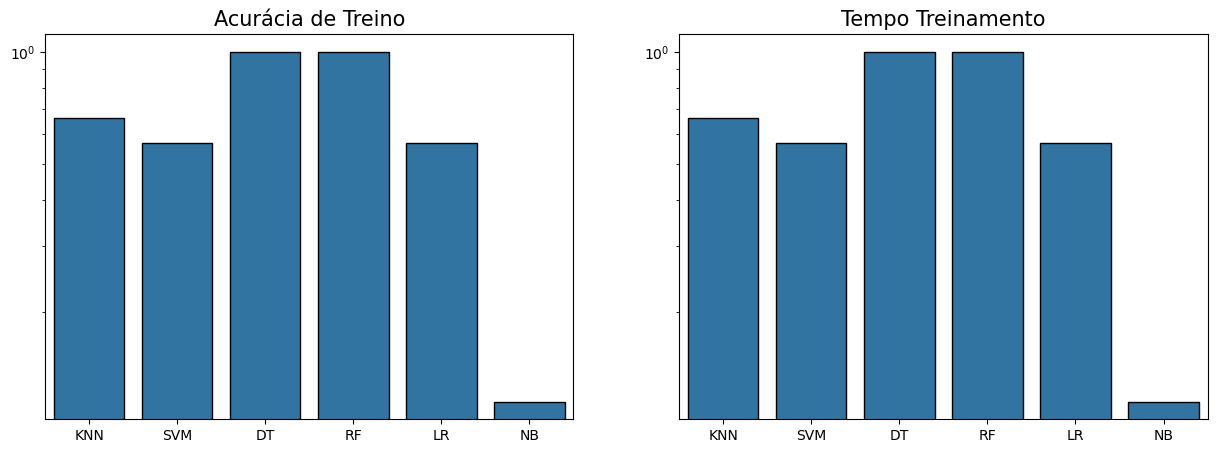

In [19]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=list(acuracia_treino.keys()), y=list(acuracia_treino.values()),
ax=ax[0], ec='k')
sns.barplot(x=list(acuracia_treino.keys()), y=list(acuracia_treino.values()),
ax=ax[1], ec='k')
ax[0].set_yscale('log')
ax[0].set_title('Acurácia de Treino', size=15)
ax[1].set_yscale('log')
ax[1].set_title('Tempo Treinamento', size=15)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
metricas = {}
for clf in classificadores:
    metricas[clf] = {}
    classificadores[clf].fit(X_train, y_train)
    predictions = classificadores[clf].predict(X_test)
    metricas[clf]['accuracy'] = accuracy_score(y_test, predictions)
    metricas[clf]['precision'] = precision_score(y_test, predictions,average='micro')
    metricas[clf]['recall'] = recall_score(y_test, predictions, average='micro')
    metricas[clf]['f1'] = f1_score(y_test, predictions, average='micro')
resultado = pd.DataFrame(metricas)

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

In [21]:
resultado

,KNN,SVM,DT,RF,LR,NB
accuracy,0.48854,0.566365,0.46901,0.572555,0.570074,0.113445
precision,0.48854,0.566365,0.46901,0.572555,0.570074,0.113445
recall,0.48854,0.566365,0.46901,0.572555,0.570074,0.113445
f1,0.48854,0.566365,0.46901,0.572555,0.570074,0.113445


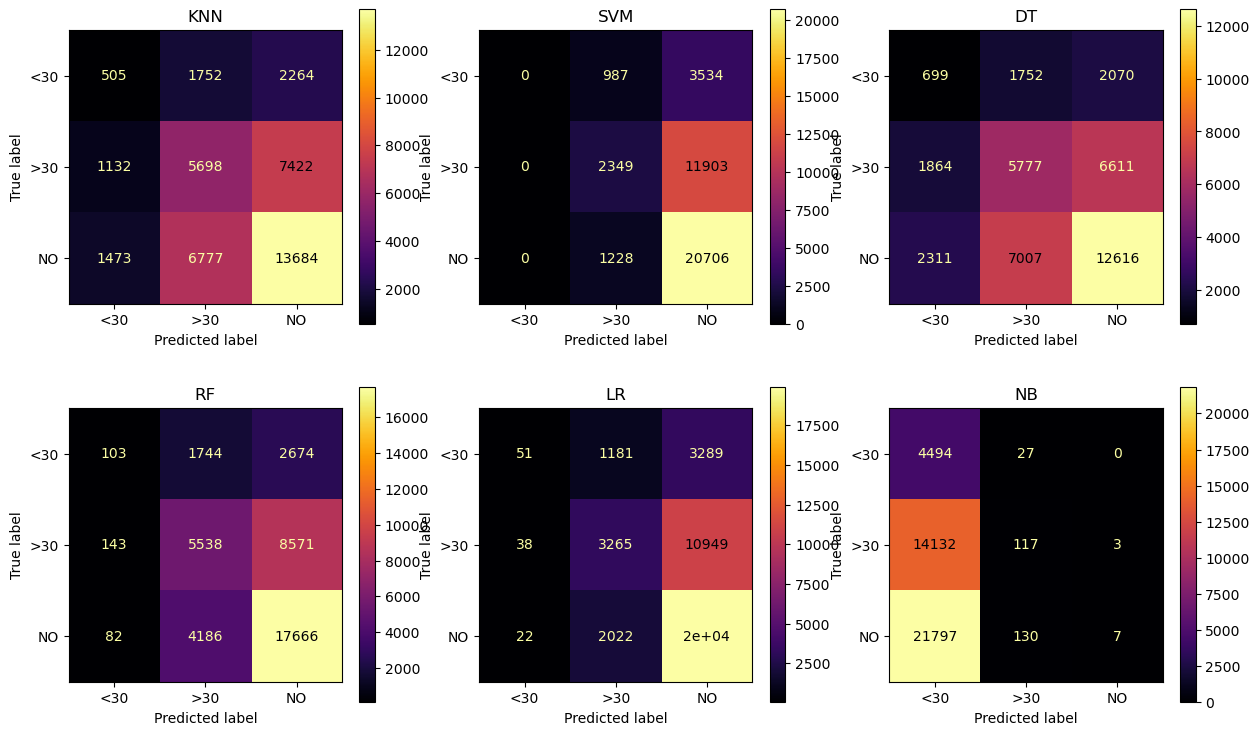

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
ax = ax.flatten()
for idx, clf in enumerate(classificadores):
    predictions = classificadores[clf].predict(X_test)
    cm = confusion_matrix(y_test, predictions, )
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
    display_labels=classificadores[clf].classes_, )
    disp.plot(ax=ax[idx], cmap='inferno')
    ax[idx].set_title(clf)

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

Text(0, 0.5, 'Acurácia média')

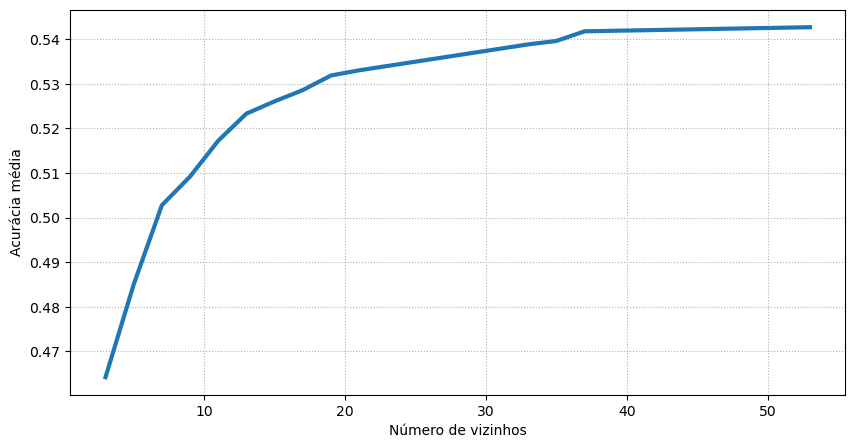

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
ks = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 37, 33, 35, 53]
accs = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    accs.append(scores.mean())
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=ks, y=accs, linewidth=3, ax=ax)
plt.grid(True, linestyle=':')
plt.xlabel('Número de vizinhos')
plt.ylabel('Acurácia média')

In [24]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(X)
x_treino, x_teste, y_treino, y_teste = train_test_split(dados_pca, y, test_size=0.2, random_state=99, shuffle=True)

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ValueError: y must be a NumPy array. Found <class 'pandas.core.frame.DataFrame'>

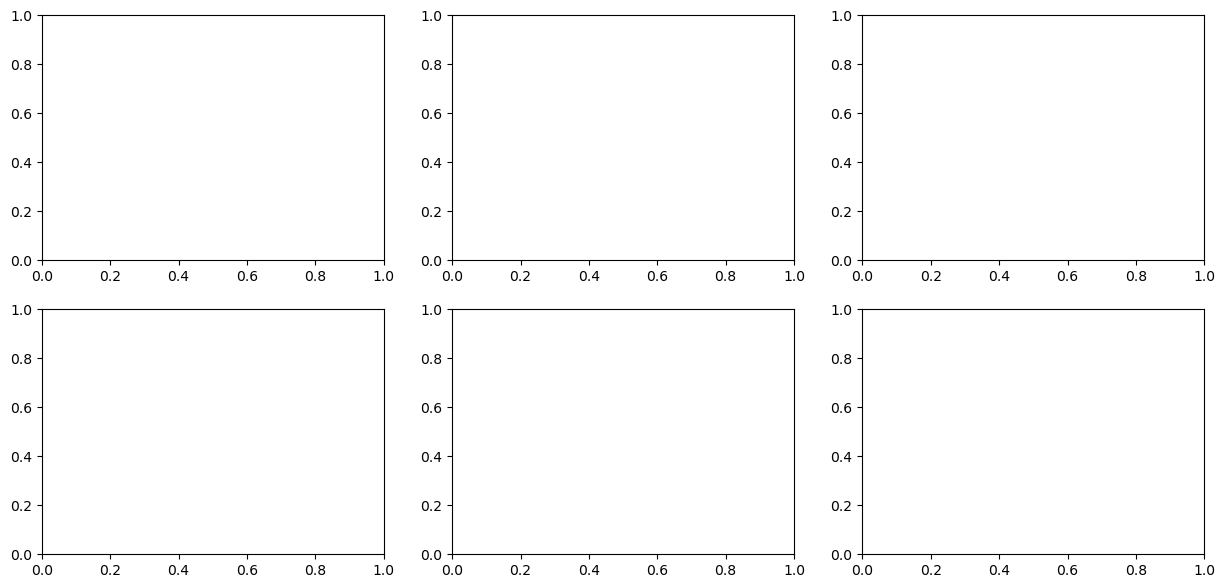

In [26]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
ax = ax.flatten()
for idx, clf in enumerate(classificadores):
    classificadores[clf].fit(x_treino, y_treino)
    plot_decision_regions(x_teste, y_teste, clf=classificadores[clf],
                         legend=2, ax=ax[idx], colors='blue,red')
    ax[idx].set_title(clf)